# BM 336546 - HW2: Type 1 Diabetes (T1D)
Our goal is to predict if a patient suffers from T1D, by applying ML algorithms on the given dataset. 


### 1) Loading the data

Let's start the assignment by loading the data and explain any preprocessing.

Loading the data:

In [14]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
%reload_ext autoreload

file = Path.cwd().joinpath('HW2_data.csv') # concatenates HW2_data.csv to the current folder
T1D_dataset = pd.read_csv(file) # load the data

random.seed(10)  # fill your seed number here
print('hello')

hello


Now we can apply some preprocessing. We decided to fill the empty cells (nan) with random values from each column, in order to be able to interpret all the lines all the dataset. Due to the binary nature of our dataset, filling nans with random values from the dataset is more appropriate than any metrics (median,...) of the features. Also, we could have thought about erasing the rows (patients) with any nan, but due to the high number of such rows, we decided to choose an imputation method. 

In [15]:
from helpers_function import nan2rand_val as rv

filled_dataset = rv(T1D_dataset)

### 2) Splitting the data


Now we will split our dataset into a train (80%) and test (20%) sets, using the sklearn function. We would like our sets to represent equally the classes (diagnosis yes or no) of the patients, therefore we will use the stratify method with the diagnosis column.

In [86]:
from sklearn.model_selection import train_test_split
X = filled_dataset.loc[:, 'Age':'Obesity']
X['Family History']=filled_dataset[['Family History']]
list_features = list(X.columns.values)
Y = T1D_dataset[['Diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)


### 3) Visualizating the data

#### a. Repartition in test/train
First, let's plot a table showing the repartition of positive features (as the features have a binary result) in each set (train and test)

In [85]:
import matplotlib.pyplot as plt
fts = ['Muscle Stiffness', 'Hair Loss', 'Obesity', 'Partial Paresis', 'Delayed Healing']

partition_ft = pd.DataFrame(columns=['Positive Feature','% in train','% in test','difference'])

partition_ft['Positive Feature'] = fts
train_lst = []
test_lst = []
for ft in fts:
    pos_ft_train = np.sum(X_train[[ft]]=='Yes')
    train_lst.append(100*pos_ft_train/len(X_train[[ft]]))
    pos_ft_test = np.sum(X_test[[ft]]=='Yes')
    test_lst.append(100*pos_ft_test/len(X_test[[ft]]))
partition_ft[['% in train']] = train_lst
partition_ft[['% in test']] = test_lst
partition_ft[['difference']] = np.array(train_lst) - np.array(test_lst)
print(partition_ft)

   Positive Feature % in train % in test difference
0  Muscle Stiffness    37.8319   31.8584    5.97345
1         Hair Loss     35.177   38.0531   -2.87611
2           Obesity    16.8142   16.8142          0
3   Partial Paresis    43.3628    39.823    3.53982
4   Delayed Healing    47.1239   42.4779    4.64602


As we can notice, the difference between the percentage of positive features in the train and in the test set is lower than 15% (in absolute value). Hence, we can conclude that the data is distributed similarly in both sets (train and test).

An imbalance of features between train and test sets could cause a bad interpretation of the dataset; if in the train set, we have a lot more positive values ('Yes') for a specific feature, the model trained on it will be fitted accordingly (will be very accurate for that positive feature), but not taking in consideration the negative values ('No'), that we will surely interpret wrongly in the test set. Also, having an imbalanced dataset will force us to reduce the performance metrics relevant for the problem (accuracy is not relevant in that case, we will prefer measure the performances of the models with f1, Area Under the ROC,...).

In order to solve such an issue, we can for example split the dataset again. If the amount of features is quite small, we can split using the ratio 80/20% while selecting the data according to the imbalanced represented feature and the diagnosis (we want to be balanced as well). Another idea may be collect more data to include in our dataset, in order to increase the chance to have more balance between the features themselves in the sets, and also a good balance for the diagnosis in both sets (which can be obtain using stratification).

#### b. Relationship between features and label

We will now plot the relationship between features and label:

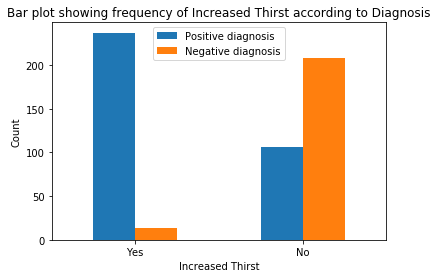

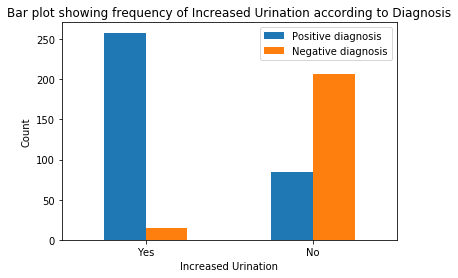

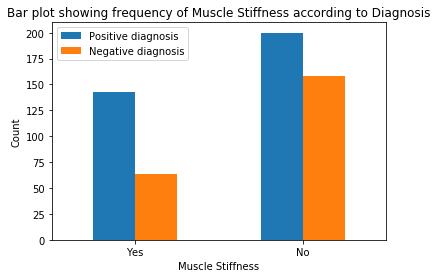

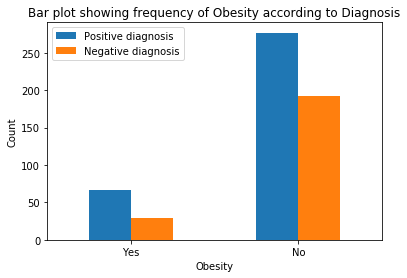

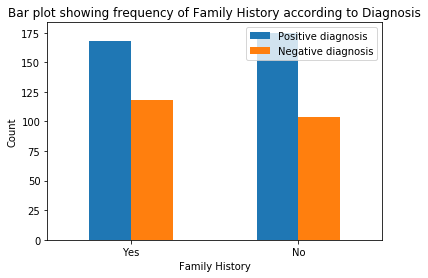

In [88]:
fts = ['Increased Thirst', 'Increased Urination', 'Muscle Stiffness', 'Obesity']
for ft in fts:
    DiagYesFt = filled_dataset[ft].loc[filled_dataset['Diagnosis'] == 'Positive']
    DiagYesFtYes = np.sum(DiagYesFt == 'Yes')
    DiagYesFtNo = np.sum(DiagYesFt == 'No')

    DiagNoFt = filled_dataset[ft].loc[filled_dataset['Diagnosis'] == 'Negative']
    DiagNoFtYes = np.sum(DiagNoFt == 'Yes')
    DiagNoFtNo = np.sum(DiagNoFt == 'No')
    DiagYes = [DiagYesFtYes, DiagYesFtNo]
    DiagNo = [DiagNoFtYes, DiagNoFtNo]
    index = ['Yes','No']
    df = pd.DataFrame({'Positive diagnosis': DiagYes,
                       'Negative diagnosis': DiagNo}, index=index)
    ax = df.plot.bar(rot=0)
    ax.set_xlabel(ft)
    ax.set_ylabel('Count')
    ax.set_title(f'Bar plot showing frequency of {ft} according to Diagnosis')

ft = 'Family History'
DiagYesFt = filled_dataset[ft].loc[filled_dataset['Diagnosis'] == 'Positive']
DiagYesFtYes = np.sum(DiagYesFt == 1)
DiagYesFtNo = np.sum(DiagYesFt == 0)

DiagNoFt = filled_dataset[ft].loc[filled_dataset['Diagnosis'] == 'Negative']
DiagNoFtYes = np.sum(DiagNoFt == 1)
DiagNoFtNo = np.sum(DiagNoFt == 0)
DiagYes = [DiagYesFtYes, DiagYesFtNo]
DiagNo = [DiagNoFtYes, DiagNoFtNo]
index = ['Yes','No']
df = pd.DataFrame({'Positive diagnosis': DiagYes,
                   'Negative diagnosis': DiagNo}, index=index)
ax = df.plot.bar(rot=0)
ax.set_xlabel(ft)
ax.set_ylabel('Count')
ax.set_title(f'Bar plot showing frequency of {ft} according to Diagnosis')

plt.show()

As we can see, we have two features ('Increase Thrist', 'Increased Urination') which are very discriminative; for a 'Yes' answer from the patient, we have a great chance to be having Type 1 Diabetes, and a good chance of not having it for a 'No' answer (with a greatest discriminability for the 'Yes' answer). Meaning the features form a good correlation with the diagnosis 

On the opposite, the three last features ('Obesity', 'Muscle Stiffness', 'Family History'), an answer 'Yes' or 'No' leads in both case to have a greater probability to have a positive diagnosis, therefore they do not seem helpful for the classification.

A surprising result is 'Family History' not being a good feature, as we could have thought genetics is a significative factor of the disease.

#### c. Age distribution

Now let's plot an histogram of ages to see the distribution of ages in our dataset

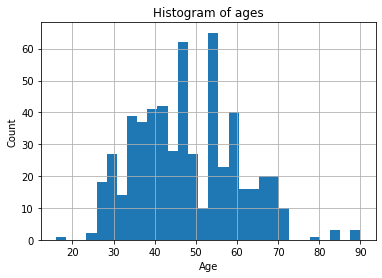

In [19]:
feat = 'Age'

filled_dataset[feat].hist(bins=30)
plt.title('Histogram of ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

As we can see, the ages distribution has a Gaussian shape, with a peak around 55 years (the most represented age group). Meaning we have a lot more data from people in their 50s than in their 20s or 80s. This is to take in consideration, the dataset is adequate for people in a specific age range and might not be very accurate with a people with under-represented age.

#### d. Age distribution according to the diagnosis

Now, let's plot the age distributions for sick and non sick patients independantly:

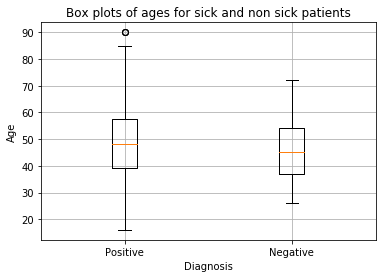

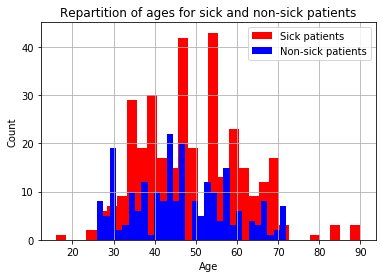

In [90]:
feat = 'Age'
Pos_dataset = filled_dataset[filled_dataset['Diagnosis']=='Positive']
Neg_dataset = filled_dataset[filled_dataset['Diagnosis']=='Negative']

fig1, ax1 = plt.subplots()

data = [np.asarray(Pos_dataset[feat], dtype=int), np.asarray(Neg_dataset[feat], dtype=int)]

ax1.boxplot(data)
ax1.set_xticklabels(['Positive', 'Negative'])
ax1.set_title('Box plots of ages for sick and non sick patients')
ax1.set_xlabel('Diagnosis')
ax1.set_ylabel('Age')
plt.grid()
plt.show()

Pos_dataset[feat].hist(bins=30, color='r', label='Sick patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

Neg_dataset = filled_dataset[filled_dataset['Diagnosis']=='Negative']
Neg_dataset[feat].hist(bins=30, color='b', label='Non-sick patients')
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()
plt.title('Repartition of ages for sick and non-sick patients')
plt.show()

As we can notice, the distribution of sick and non sick patients according to their ages is significative; the sick patients represent a group of age older than the non-sick patients, therefore it adds information about the probability of having the illness.

### 4) Encoding the data as one hot vectors 

We will now transform the dataset into one hot vectors, in order to make it interpretable for the machine learning algorithms used later:

In [95]:
bin_Xtrain = pd.get_dummies(X_train, drop_first=True)
bin_Xtest = pd.get_dummies(X_test, drop_first=True)
bin_ytrain = pd.get_dummies(y_train, drop_first=True)
bin_ytest = pd.get_dummies(y_test, drop_first=True)

### 5) 5K Cross Fold Validation and evaluation of two models

Let's start by doing a 5K cross fold validation. 

In this section, we want to train one linear model (we chose logistic regression) and one non-linear model (we chose random forest), tuning their ideal parameters with a 5K cross fold validation and reporting their ROC AUC result.

We start by tuning the logistic regression model:

In [96]:
from sklearn.model_selection import StratifiedKFold as SKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score, f1_score

import warnings
from helpers_function import tune_LogReg, tune_RandForest

kf = SKFold(n_splits=5)
best_params_LR = tune_LogReg(kf, bin_Xtrain, bin_ytrain)
print('The best parameters tuned are: ',best_params_LR)

The best parameters tuned are:  {'C': 1.0, 'penalty': 'l1', 'auc_score': 0.9646464646464646}


Let's report the performance score on the test set using the tuned parameters:

In [97]:
from sklearn.metrics import accuracy_score
from helpers_function import report_performance

clf = LogisticRegression(solver='saga',penalty=best_params_LR['penalty'], C=best_params_LR['C'], 
                   max_iter=100000, class_weight='balanced', l1_ratio=0.5).fit(bin_Xtrain,bin_ytrain)

indexes = ['Logistic Regression, on train','Logistic Regression, on test',
           'Random Forest, on train', 'Random Forest, on test']
df_scores = pd.DataFrame(columns=['F1 score','Accuracy','ROC AUC','Log loss'], index=indexes)
df_scores.loc['Logistic Regression, on train'] = report_performance(clf,bin_Xtrain, bin_ytrain)
df_scores.loc['Logistic Regression, on test'] = report_performance(clf,bin_Xtest, bin_ytest)


print(df_scores.head(2))

                               F1 score  Accuracy   ROC AUC Log loss
Logistic Regression, on train  0.939623  0.929204  0.976318  2.11892
Logistic Regression, on test   0.924242  0.911504  0.974308  2.79347


Let's see if we can do better with a non-linear model.

Let's tune the Random forest model:

In [98]:
from sklearn.ensemble import RandomForestClassifier
best_params_RF = tune_RandForest(kf, bin_Xtrain, bin_ytrain)

print(best_params_RF)

{'Nb_trees': 200, 'Criterion': 'entropy', 'Max_features': 2, 'oob_score': False, 'auc_score': 0.9992424242424242}


Let's report the performance score on the test set using the tuned parameters:

In [99]:
clf = RandomForestClassifier(class_weight='balanced', n_estimators=best_params_RF['Nb_trees'],
                             criterion=best_params_RF['Criterion'], max_features=best_params_RF['Max_features'], 
                             oob_score=best_params_RF['oob_score']).fit(bin_Xtrain,bin_ytrain)

df_scores.loc['Random Forest, on train'] = report_performance(clf,bin_Xtrain, bin_ytrain, type_decision='predict_proba')
df_scores.loc['Random Forest, on test'] = report_performance(clf,bin_Xtest, bin_ytest, type_decision='predict_proba')
print(df_scores.head(4))

                               F1 score  Accuracy   ROC AUC  Log loss
Logistic Regression, on train  0.939623  0.929204  0.976318   2.11892
Logistic Regression, on test   0.924242  0.911504  0.974308   2.79347
Random Forest, on train               1         1         1  0.035131
Random Forest, on test         0.978723  0.973451  0.999341  0.100178


As we can notice, a non-linear model seems to fit better to our problem. All the performance scores are better using Random forest.

### 6) Feature selection

Now, we would like to use our random forest model in order to find the two most important features of our dataset:

The first most important feature is Increased Thirst_Yes
The second most important feature is Increased Urination_Yes


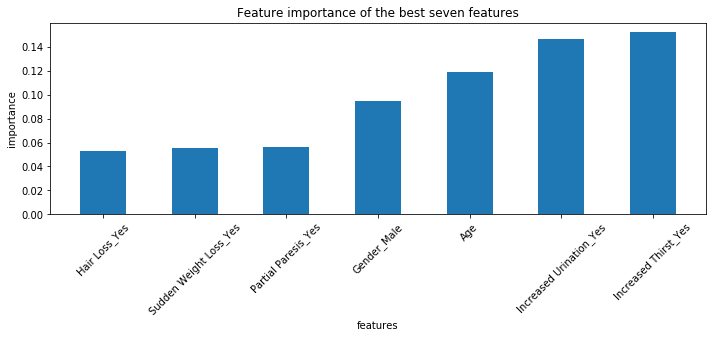

In [100]:
from  matplotlib import pyplot as plt
importance = clf.feature_importances_

df_pvals_labels = list(bin_Xtrain.columns.values)

sorted_labels = [x for _,x in sorted(zip(importance,df_pvals_labels))]

sorted_imp = sorted(importance)

sorted_labels = sorted_labels[10:]
sorted_imp = sorted_imp[10:]
Imp_ft1 = sorted_labels[len(sorted_labels)-1]
Imp_ft2 = sorted_labels[len(sorted_labels)-2]
print(f'The first most important feature is {Imp_ft1}')
print(f'The second most important feature is {Imp_ft2}')
fig = plt.figure(figsize=[10, 4.8])
ax = fig.add_subplot(111)
rects1 = ax.bar([x for x in range(len(importance[10:]))], sorted_imp,
                     align='center', tick_label=sorted_labels, width=0.5)
ax.set_xticklabels(sorted_labels, rotation=45 )
ax.set_title('Feature importance of the best seven features')
ax.set_xlabel('features')
ax.set_ylabel('importance')


plt.tight_layout()

plt.show()


In the graph above, we plotted the feature importance using random forest of the seven best features; the two best are 'Increased Urination_Yes' and 'Increased Thirst_Yes', which is in adequation with the data exploration we did in the section 2 (we saw that those specific features were very significative for the diagnosis).

### 7) Data Separability Visualization

Now we would like to apply a dimensionality reduction on the dataset:

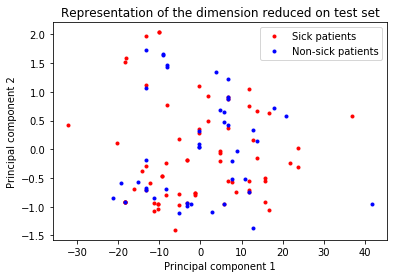

In [101]:
from sklearn.decomposition import PCA, SparsePCA, MiniBatchSparsePCA, IncrementalPCA

Dim_red = PCA(n_components=2)
Dim_red.fit_transform(bin_Xtrain)
comp_train = Dim_red.fit_transform(bin_Xtrain).T
comp_test = Dim_red.transform(bin_Xtest).T
y_test = bin_ytest
pc1 = comp[0]
pc2 = comp[1]
plt.plot(pc1[np.where(y_test==1)[0]],pc2[np.where(y_test==1)[0]], '.', color='r', label="Sick patients")
plt.plot(pc1[np.where(y_test==0)[0]],pc2[np.where(y_test==0)[0]], '.', color='b', label="Non-sick patients")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Representation of the dimension reduced on test set')
plt.legend()
plt.show()

We can see that the data is not really separable; this is due to the fact that PCA does not perform well on binary data, which is not the best option to perform dimension reduction here. But, we can still see two spaces where each diagnosis (Positive or Negative) is mostly represented, with errors on each side. 

In [102]:
new_Xtrain = comp_train.T
new_Xtest = comp_test.T
clf = LogisticRegression(solver='saga',penalty=best_params_LR['penalty'], C=best_params_LR['C'], 
                   max_iter=100000, class_weight='balanced', l1_ratio=0.5).fit(new_Xtrain,bin_ytrain)

indexes = ['Logistic Regression, on train','Logistic Regression, on test',
           'Random Forest, on train', 'Random Forest, on test']
df_scores = pd.DataFrame(columns=['F1 score','Accuracy','ROC AUC','Log loss'], index=indexes)
df_scores.loc['Logistic Regression, on train'] = report_performance(clf,new_Xtrain, bin_ytrain)
df_scores.loc['Logistic Regression, on test'] = report_performance(clf,new_Xtest, bin_ytest)
print(df_scores.head(2))

                               F1 score  Accuracy   ROC AUC Log loss
Logistic Regression, on train  0.854962  0.831858  0.914603  4.29262
Logistic Regression, on test    0.87218  0.849558  0.934783  4.04443


Now let's observe the performance with Random forest:

In [103]:
clf = RandomForestClassifier(class_weight='balanced', n_estimators=best_params_RF['Nb_trees'],
                             criterion=best_params_RF['Criterion'], max_features=2, 
                             oob_score=best_params_RF['oob_score']).fit(new_Xtrain,bin_ytrain)

df_scores.loc['Random Forest, on train'] = report_performance(clf,new_Xtrain, bin_ytrain, type_decision='predict_proba')
df_scores.loc['Random Forest, on test'] = report_performance(clf,new_Xtest, bin_ytest, type_decision='predict_proba')
print(df_scores.head(4))

                               F1 score  Accuracy   ROC AUC   Log loss
Logistic Regression, on train  0.854962  0.831858  0.914603    4.29262
Logistic Regression, on test    0.87218  0.849558  0.934783    4.04443
Random Forest, on train               1         1         1  0.0505684
Random Forest, on test         0.927536  0.911504  0.966897   0.243506


Now we'll do the same with the best two features of section 6:

In [104]:
Xtrain_2best = bin_Xtrain.loc[:, [Imp_ft1, Imp_ft2]]
Xtest_2best = bin_Xtest.loc[:, [Imp_ft1, Imp_ft2]]
clf = LogisticRegression(solver='saga',penalty=best_params_LR['penalty'], C=best_params_LR['C'], 
                   max_iter=100000, class_weight='balanced', l1_ratio=0.5).fit(Xtrain_2best,bin_ytrain)

indexes = ['Logistic Regression, on train','Logistic Regression, on test',
           'Random Forest, on train', 'Random Forest, on test']
df_scores_2best = pd.DataFrame(columns=['F1 score','Accuracy','ROC AUC','Log loss'], index=indexes)
df_scores_2best.loc['Logistic Regression, on train'] = report_performance(clf,Xtrain_2best, bin_ytrain)
df_scores_2best.loc['Logistic Regression, on test'] = report_performance(clf,Xtest_2best, bin_ytest)
print(df_scores_2best.head(2))

                               F1 score  Accuracy   ROC AUC Log loss
Logistic Regression, on train  0.879699  0.858407  0.899348  3.22398
Logistic Regression, on test   0.887218  0.867257  0.895916  3.23722


Now let's observe the performance with Random forest:

In [105]:
clf = RandomForestClassifier(class_weight='balanced', n_estimators=best_params_RF['Nb_trees'],
                             criterion=best_params_RF['Criterion'], max_features=2, 
                             oob_score=best_params_RF['oob_score']).fit(Xtrain_2best,bin_ytrain)

df_scores_2best.loc['Random Forest, on train'] = report_performance(clf,Xtrain_2best, bin_ytrain, type_decision='predict_proba')
df_scores_2best.loc['Random Forest, on test'] = report_performance(clf,Xtest_2best, bin_ytest, type_decision='predict_proba')

print('Performance scores for the 2 most important features: \n')
print(df_scores_2best.head(4))
print('\nPerformance scores for the 2 principal components using PCA: \n')
print(df_scores.head(4))

Performance scores for the 2 most important features: 

                               F1 score  Accuracy   ROC AUC  Log loss
Logistic Regression, on train  0.879699  0.858407  0.899348   3.22398
Logistic Regression, on test   0.887218  0.867257  0.895916   3.23722
Random Forest, on train        0.879699  0.858407  0.899348  0.348051
Random Forest, on test         0.887218  0.867257  0.895916  0.338838

Performance scores for the 2 principal components using PCA: 

                               F1 score  Accuracy   ROC AUC   Log loss
Logistic Regression, on train  0.854962  0.831858  0.914603    4.29262
Logistic Regression, on test    0.87218  0.849558  0.934783    4.04443
Random Forest, on train               1         1         1  0.0505684
Random Forest, on test         0.927536  0.911504  0.966897   0.243506


As we can notice, the two principal components given by dimensionality reduction (PCA) give better performance scores on the test set and very close scores on the train set (the best two features give slightly better results on the train set).

That's all folks!

### Trial with TruncatedSVD (supposed to work better for sparse matrices) -> not better

                               F1 score  Accuracy   ROC AUC Log loss
Logistic Regression, on train  0.852772  0.829646  0.914213  4.38614
Logistic Regression, on test   0.880597  0.858407  0.933465  3.79497
                               F1 score  Accuracy   ROC AUC   Log loss
Logistic Regression, on train  0.852772  0.829646  0.914213    4.38614
Logistic Regression, on test   0.880597  0.858407  0.933465    3.79497
Random Forest, on train               1         1         1  0.0487927
Random Forest, on test         0.920863  0.902655  0.965415   0.246217


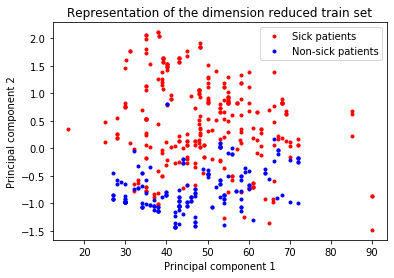

In [106]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

Dim_red2 = TruncatedSVD(n_components=2)
Dim_red2.fit(bin_Xtrain)
comp2 = Dim_red2.transform(bin_Xtrain).T
y_train = bin_ytrain
pc1 = comp2[0]
pc2 = comp2[1]
plt.plot(pc1[np.where(y_train==1)[0]],pc2[np.where(y_train==1)[0]], '.', color='r', label="Sick patients")
plt.plot(pc1[np.where(y_train==0)[0]],pc2[np.where(y_train==0)[0]], '.', color='b', label="Non-sick patients")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Representation of the dimension reduced train set')
plt.legend()

new_Xtrain2 = comp2.T
new_Xtest2 = Dim_red2.transform(bin_Xtest)
clf = LogisticRegression(solver='saga',penalty=best_params_LR['penalty'], C=best_params_LR['C'], 
                   max_iter=100000, class_weight='balanced', l1_ratio=0.5).fit(new_Xtrain2,bin_ytrain)

indexes = ['Logistic Regression, on train','Logistic Regression, on test',
           'Random Forest, on train', 'Random Forest, on test']
df_scores = pd.DataFrame(columns=['F1 score','Accuracy','ROC AUC','Log loss'], index=indexes)
df_scores.loc['Logistic Regression, on train'] = report_performance(clf,new_Xtrain2, bin_ytrain)
df_scores.loc['Logistic Regression, on test'] = report_performance(clf,new_Xtest2, bin_ytest)
print(df_scores.head(2))

clf = RandomForestClassifier(class_weight='balanced', n_estimators=best_params_RF['Nb_trees'],
                             criterion=best_params_RF['Criterion'], max_features=2, 
                             oob_score=best_params_RF['oob_score']).fit(new_Xtrain,bin_ytrain)

df_scores.loc['Random Forest, on train'] = report_performance(clf,new_Xtrain, bin_ytrain, type_decision='predict_proba')
df_scores.loc['Random Forest, on test'] = report_performance(clf,new_Xtest, bin_ytest, type_decision='predict_proba')
print(df_scores.head(4))